In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def experiment_df(experiments):
    df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC,
        "F1 Macro": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).F1_Macro,
        "AUC": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).AUC["positive"],
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "N": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments if "confusion_matrix" in experiment and pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa != 'None' ]).sort_values("kappa", ascending=False)
    return df

In [3]:
wd_v6 = experiment_df(json.load(open('../experiments/wd_gpt-4_label_results.json')))
wd_v4 = experiment_df(json.load(open('../experiments/wd_gpt-4_serialization_from_wikidata_results.json')))
wd_v3 = experiment_df(json.load(open('../experiments/wd_gpt-4_description_from_wikipedia_results.json')))
caligraph_v2 = experiment_df(json.load(open('../experiments/caligraph_gpt-4_label_results.json')))
caligraph_v3 = experiment_df(json.load(open('../experiments/caligraph_gpt-4_serialization_results.json')))
caligraph_v4 = experiment_df(json.load(open('../experiments/caligraph_gpt-3.5-turbo_serialization_results.json')))
caligraph_v5 = experiment_df(json.load(open('../experiments/caligraph_gpt-4_description_results.json')))

In [4]:
wd_v4[["AUC", "F1 Macro"]].mean()

AUC         0.82250
F1 Macro    0.80389
dtype: float64

In [5]:
wd_v4[["N", "FN", "FP"]].sum()

N     800
FN    120
FP     22
dtype: int64

In [7]:
wd_v3[["ACC", "F1 Macro", "ACC"]].mean()

ACC         0.837500
F1 Macro    0.827691
ACC         0.837500
dtype: float64

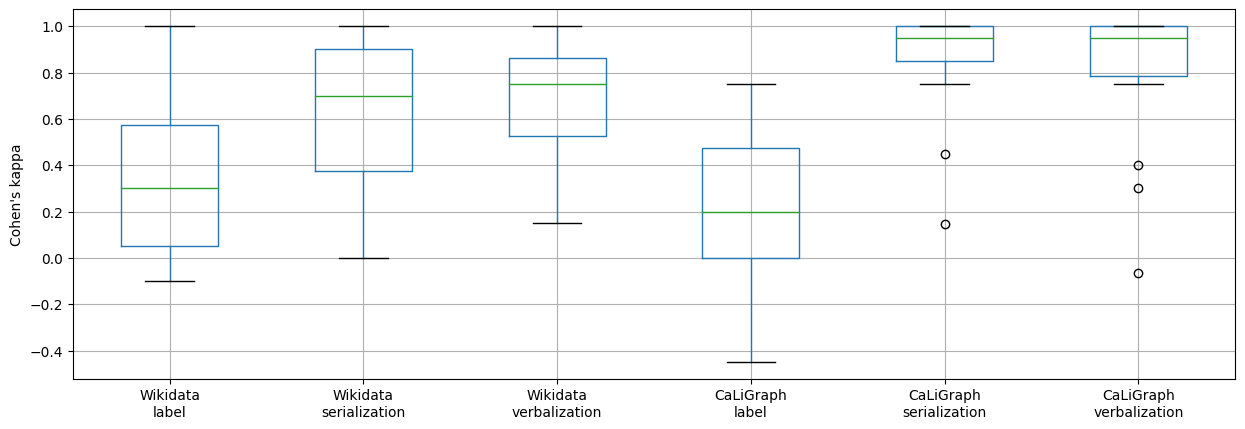

In [8]:
df = pd.concat([
    wd_v6["kappa"], 
    wd_v4["kappa"], 
    wd_v3["kappa"], 
    caligraph_v2["kappa"], 
    # caligraph_v4["kappa"], 
    caligraph_v3["kappa"], 
    caligraph_v5["kappa"]
    ], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis([
    "Wikidata\nlabel", 
    "Wikidata\nserialization", 
    "Wikidata\nverbalization", 
    "CaLiGraph\nlabel", 
    # "CaLiGraph\ngpt-3.5-turbo/serialization", 
    "CaLiGraph\nserialization", 
    "CaLiGraph\nverbalization"
    ], axis=1)
plot = df.boxplot(return_type='axes')
plot.figure.set_figwidth(15)
plot.set_ylabel('Cohen\'s kappa')
plt.show(plot)

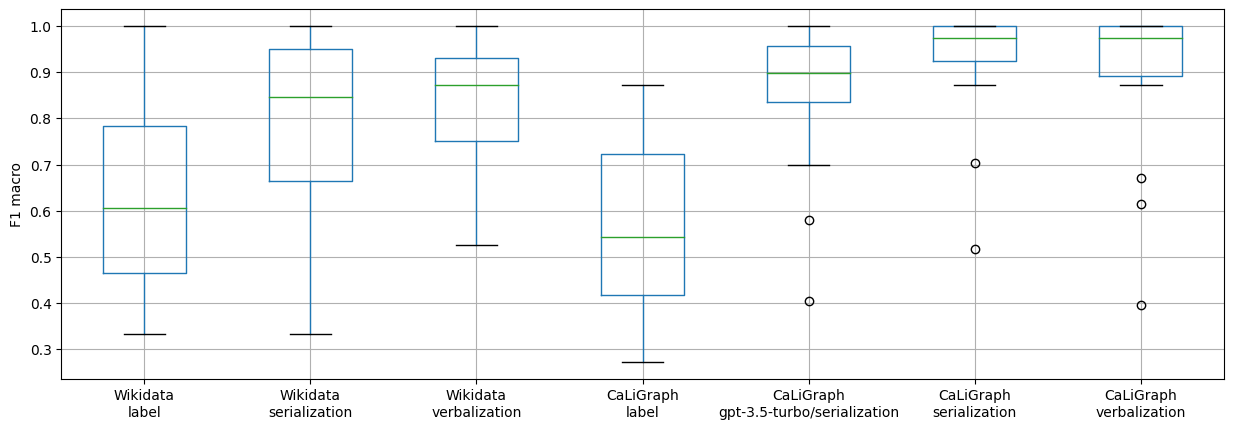

In [13]:
df = pd.concat([
    wd_v6["F1 Macro"], 
    wd_v4["F1 Macro"], 
    wd_v3["F1 Macro"], 
    caligraph_v2["F1 Macro"], 
    caligraph_v4["F1 Macro"], 
    caligraph_v3["F1 Macro"], 
    caligraph_v5["F1 Macro"]
    ], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis([
    "Wikidata\nlabel", 
    "Wikidata\nserialization", 
    "Wikidata\nverbalization", 
    "CaLiGraph\nlabel", 
    "CaLiGraph\ngpt-3.5-turbo/serialization", 
    "CaLiGraph\nserialization", 
    "CaLiGraph\nverbalization"
    ], axis=1)
plot = df.boxplot(return_type='axes')
plot.figure.set_figwidth(15)
plot.set_ylabel('F1 macro')
plt.show(plot)

In [25]:
df = pd.concat([
    wd_v6[["AUC", "F1 Macro"]].mean(), 
    wd_v4[["AUC", "F1 Macro"]].mean(), 
    wd_v3[["AUC", "F1 Macro"]].mean(), 
    caligraph_v2[["AUC", "F1 Macro"]].mean(), 
    caligraph_v4[["AUC", "F1 Macro"]].mean(), 
    caligraph_v3[["AUC", "F1 Macro"]].mean(), 
    caligraph_v5[["AUC", "F1 Macro"]].mean()
    ], axis=1).T
df

,AUC,F1 Macro
0,0.681250,0.625192
1,0.822500,0.803890
2,0.837500,0.827691
3,0.615139,0.562794
4,0.868056,0.862337
5,0.934503,0.931045
6,0.912500,0.905057


In [23]:
df = pd.concat([
    wd_v6[["N", "FN", "FP"]].sum(), 
    wd_v4[["N", "FN", "FP"]].sum(), 
    wd_v3[["N", "FN", "FP"]].sum(), 
    caligraph_v2[["N", "FN", "FP"]].sum(), 
    caligraph_v4[["N", "FN", "FP"]].sum(), 
    caligraph_v3[["N", "FN", "FP"]].sum(), 
    caligraph_v5[["N", "FN", "FP"]].sum()
    ], axis=1).T
df

,N,FN,FP
0,800,239,16
1,800,120,22
2,800,105,25
3,789,261,42
4,789,28,69
5,749,18,22
6,789,28,31


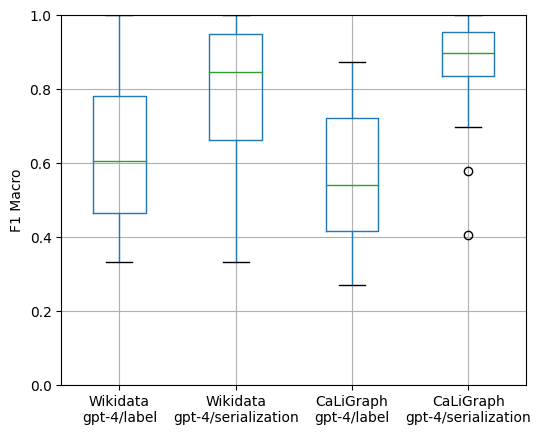

In [9]:
df = pd.concat([wd_v6["F1 Macro"], wd_v4["F1 Macro"], caligraph_v2["F1 Macro"], caligraph_v4["F1 Macro"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["Wikidata\ngpt-4/label", "Wikidata\ngpt-4/serialization", "CaLiGraph\ngpt-4/label", "CaLiGraph\ngpt-4/serialization"], axis=1)
plot = df.boxplot(return_type='axes')
plot.figure.set_figwidth(6)
plot.set_ylabel('F1 Macro')
plot.set_ylim(0.0, 1.0)
plt.show(plot)

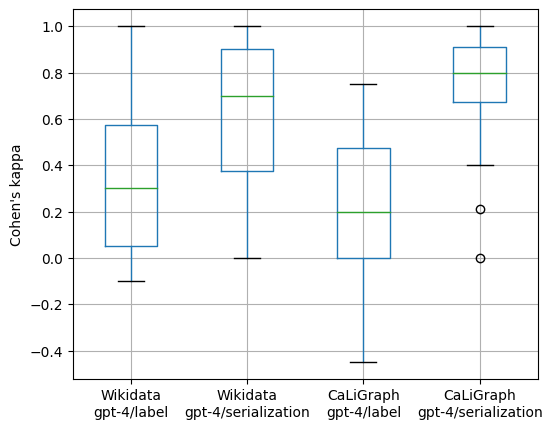

In [11]:
df = pd.concat([wd_v6["kappa"], wd_v4["kappa"], caligraph_v2["kappa"], caligraph_v4["kappa"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["Wikidata\ngpt-4/label", "Wikidata\ngpt-4/serialization", "CaLiGraph\ngpt-4/label", "CaLiGraph\ngpt-4/serialization"], axis=1)
plot = df.boxplot(return_type='axes')
plot.figure.set_figwidth(6)
plot.set_ylabel('Cohen\'s kappa')
# plot.set_ylim(0.0, 1.0)
plt.show(plot)